In [65]:
import torch
import re
import os
import onnxruntime as rt
from transformer_net import TransformerNet
from onnx_helper import Save

# convert Pytorch model to ONNX
dummy_input = torch.randn(10, 3, 224, 224)
with torch.no_grad():
    model = TransformerNet()
    model_dict = torch.load("C:\\Users\\t-xuwan\\examples\\fast_neural_style\\saved_models\\pointilism.model")
    for k in list(model_dict.keys()):
        if re.search(r'in\d+\.running_(mean|var)$', k):
            del model_dict[k]
    model.load_state_dict(model_dict)
    dummy_output = model(dummy_input)
Save("C:\\Users\\t-xuwan\\examples\\fast_neural_style\\saved_models\\", "transform_pointilism", model, (dummy_input,), (dummy_output,))
session = rt.InferenceSession("C:\\Users\\t-xuwan\\examples\\fast_neural_style\\saved_models\\test_transform_pointilism\\model.onnx")
print('done')

graph(%input1 : Float(10, 3, 224, 224),
      %conv1.conv2d.weight : Float(32, 3, 9, 9),
      %conv1.conv2d.bias : Float(32),
      %in1.weight : Float(32),
      %in1.bias : Float(32),
      %conv2.conv2d.weight : Float(64, 32, 3, 3),
      %conv2.conv2d.bias : Float(64),
      %in2.weight : Float(64),
      %in2.bias : Float(64),
      %conv3.conv2d.weight : Float(128, 64, 3, 3),
      %conv3.conv2d.bias : Float(128),
      %in3.weight : Float(128),
      %in3.bias : Float(128),
      %res1.conv1.conv2d.weight : Float(128, 128, 3, 3),
      %res1.conv1.conv2d.bias : Float(128),
      %res1.in1.weight : Float(128),
      %res1.in1.bias : Float(128),
      %res1.conv2.conv2d.weight : Float(128, 128, 3, 3),
      %res1.conv2.conv2d.bias : Float(128),
      %res1.in2.weight : Float(128),
      %res1.in2.bias : Float(128),
      %res2.conv1.conv2d.weight : Float(128, 128, 3, 3),
      %res2.conv1.conv2d.bias : Float(128),
      %res2.in1.weight : Float(128),
      %res2.in1.bias : Float(


done


In [56]:
from PIL import Image
import numpy as np

# loading input and resize if needed
image = Image.open("C:\\Users\\t-xuwan\\examples\\fast_neural_style\\images\\content-images\\test\\flowers.jpg")
scale = 1 # increase the scale when running into memory issues
image = image.resize((int(image.size[0] / scale), int(image.size[1] / scale)), Image.ANTIALIAS)

# Preprocess image
x = np.array(image).astype('float32')
x = np.transpose(x, [2, 0, 1])
x = np.expand_dims(x, axis=0)

float32
(1, 3, 1000, 1500)
[[[[ 6.  6.  6. ...  6.  6.  6.]
   [ 6.  6.  6. ...  6.  6.  6.]
   [ 6.  6.  6. ...  6.  6.  6.]
   ...
   [ 6.  6.  6. ...  6.  6.  6.]
   [ 6.  6.  6. ...  6.  6.  6.]
   [ 6.  6.  6. ...  6.  6.  6.]]

  [[41. 41. 41. ... 41. 41. 41.]
   [41. 41. 41. ... 41. 41. 41.]
   [41. 41. 41. ... 41. 41. 41.]
   ...
   [41. 41. 41. ... 41. 41. 41.]
   [41. 41. 41. ... 41. 41. 41.]
   [41. 41. 41. ... 41. 41. 41.]]

  [[47. 47. 47. ... 47. 47. 47.]
   [47. 47. 47. ... 47. 47. 47.]
   [47. 47. 47. ... 47. 47. 47.]
   ...
   [47. 47. 47. ... 47. 47. 47.]
   [47. 47. 47. ... 47. 47. 47.]
   [47. 47. 47. ... 47. 47. 47.]]]]


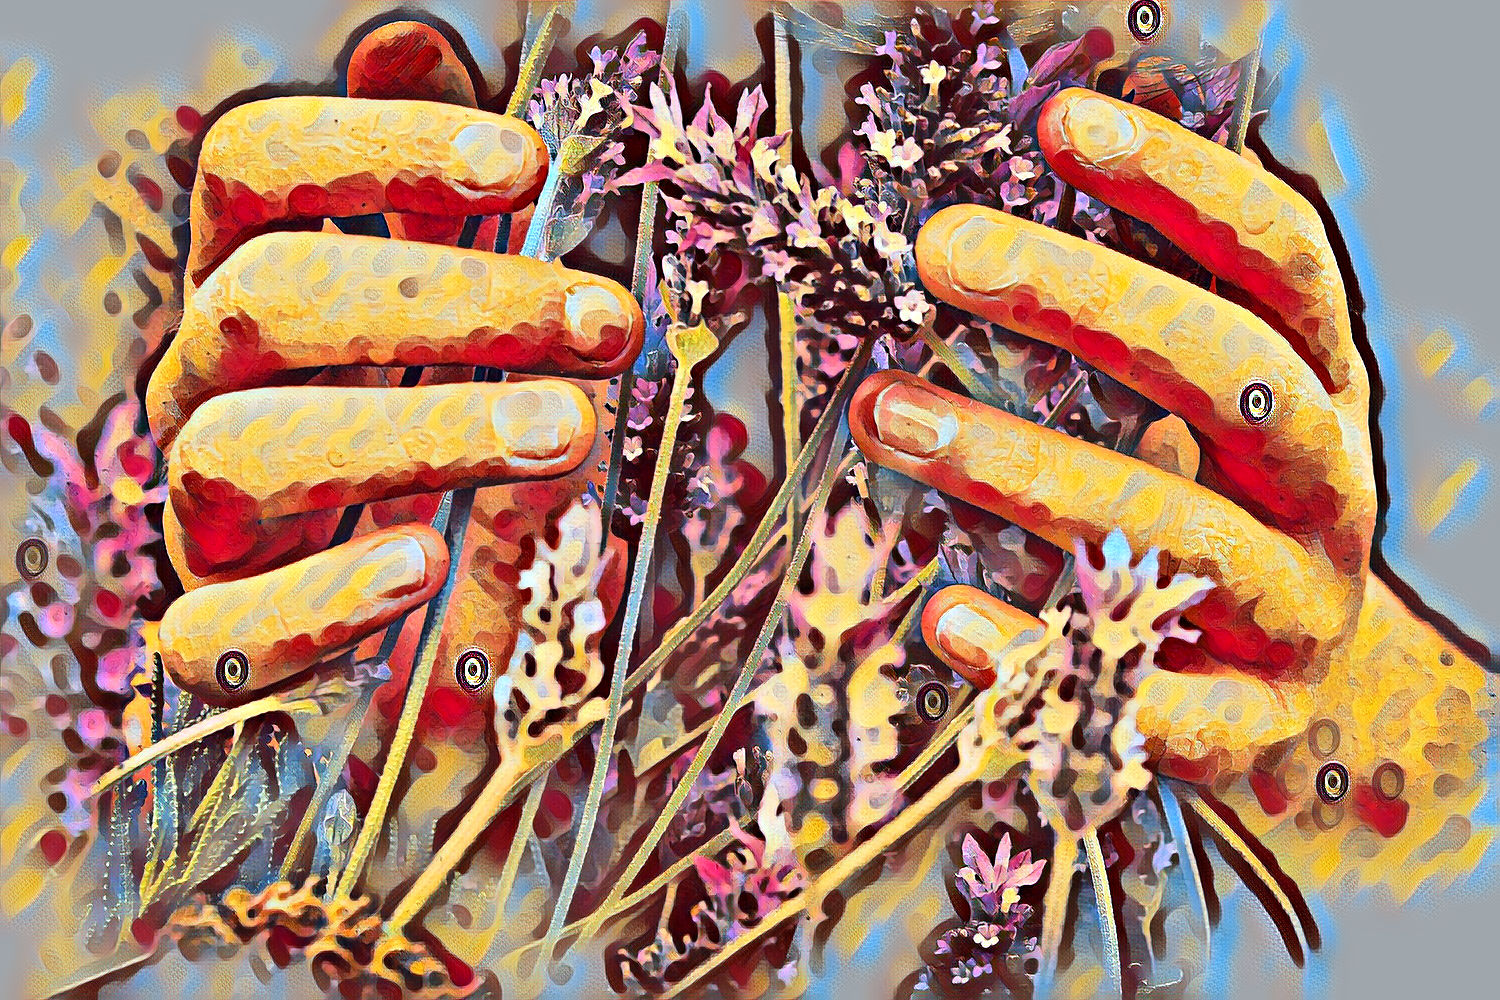

In [64]:
output_name = session.get_outputs()[0].name
output_type = session.get_outputs()[0].type
input_name = session.get_inputs()[0].name
result = session.run([output_name], {input_name: x})[0][0] 

# postprocess
result = np.clip(result, 0, 255)
result = result.transpose(1,2,0).astype("uint8")
img = Image.fromarray(result)
img

TypeError: transpose() takes 2 positional arguments but 3 were given